In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for web scraping
url = "https://www.imdb.com/search/title/?genres=action&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=f11158cc-b50b-4c4d-b0a2-40b32863395b&pf_rd_r=XZ8X52H1R40B7KG5SNZ9&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_1"

# Send GET request to the URL
response = requests.get(url)

# Create BeautifulSoup object from the response text
soup = BeautifulSoup(response.text, "html.parser")

# Initialize lists to store movie data
first_csv_data = []
second_csv_data = []

# Find all movie containers
movie_containers = soup.find_all("div", class_="lister-item-content")

# Iterate over each movie container
for sno, container in enumerate(movie_containers, start=1):
    # Extract movie details
    movie_name = container.h3.a.text
    year = container.h3.find("span", class_="lister-item-year").text.strip("()")
    duration = container.find("span", class_="runtime").text.strip(" min")
    rating = container.strong.text
    metascore = container.find("span", class_="metascore favorable").text.strip() if container.find("span", class_="metascore favorable") else ''
    directors = container.find_all("p")[2].find_all("a")

    # Extract director names and split into multiple fields
    director_names = [director.text for director in directors]
    director_fields = [f"Director{i+1}" for i in range(min(len(director_names),2))]
        
    
    # Extract other fields for the first CSV
    first_csv_row = [sno, movie_name] + director_names[:2] + [duration, year, rating, metascore]
    first_csv_data.append(first_csv_row)

    # Extract other fields for the second CSV
    stars = container.find_all("p")[2].find_all("a")[1:5]
    star_names = [star.text for star in stars]
    star_fields = [f"star{i+1}" for i in range(len(star_names))]
    genres = container.find("span", class_="genre").text.strip().split(", ")
    genre_fields = [f"genre{i+1}" for i in range(min(len(genres), 3))]

    votes = container.find("p", class_="sort-num_votes-visible").find("span", attrs={"name": "nv"}).text
    genre = genres[:3] if len(genres) >= 3 else genres + [""] * (3 - len(genres))
    gross_collection_element = next((span for span in container.find_all("span", attrs={"name": "nv"}) if "$" in span.text), None)
    gross_collection_text = gross_collection_element.text if gross_collection_element else "0"

    # Remove the '$' symbol and 'M' from the gross collection
    gross_collection_text = gross_collection_text.replace("$", "").replace("M", "")

    # Convert the gross collection to a numeric value
    gross_collection = float(gross_collection_text) if gross_collection_text else 0


    popularity = container.find("span", class_="lister-item-index unbold text-primary").text.strip(".")
    popularity = container.find("span", class_="lister-item-index unbold text-primary").text.strip(".")
    certification = container.find("span", class_="certificate").text if container.find("span", class_="certificate") else "-"

    second_csv_row = [movie_name] + star_names + [votes] + genre + [gross_collection, popularity, certification]
    second_csv_data.append(second_csv_row)

# Create dataframes for the CSV files
first_csv_df = pd.DataFrame(first_csv_data, columns=["Sno", "Movie Name"] + director_fields + ["Duration", "Year", "Ratings", "Metascore"])
second_csv_df = pd.DataFrame(second_csv_data, columns=["Movie Name"] + star_fields + ["Votes"] + genre_fields + ["Gross Collection", "Popularity", "Certification"])

# Fill null values in gross collection with 0
second_csv_df["Gross Collection"].fillna("0", inplace=True)

# Save dataframes to CSV files
first_csv_df.to_csv("movie_data_1.csv", index=False)
second_csv_df.to_csv("movie_data_2.csv", index=False)

print("Scraping and data extraction completed. Data saved to CSV files.")


Scraping and data extraction completed. Data saved to CSV files.


# PHASE 3

In [3]:
df1=pd.read_csv('movie_data_1.csv')
df2=pd.read_csv('movie_data_2.csv')
df=pd.merge(df1,df2,on='Movie Name')

In [4]:
df

,Sno,Movie Name,Director1,Director2,Duration,Year,Ratings,Metascore,star1,star2,star3,star4,Votes,genre1,genre2,genre3,Gross Collection,Popularity,Certification
0,1,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,Kemp Powers,140,2023,9.0,86.0,Kemp Powers,Justin K. Thompson,Shameik Moore,Hailee Steinfeld,"135,657",Animation,Action,Adventure,0.00,1,U
1,2,The Dark Knight,Christopher Nolan,Christian Bale,152,2008,9.0,84.0,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,727,022",Action,Crime,Drama,534.86,2,UA
2,3,The Lord of the Rings: The Return of the King,Peter Jackson,Elijah Wood,201,2003,9.0,94.0,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,891,880",Action,Adventure,Drama,377.85,3,U
3,4,Inception,Christopher Nolan,Leonardo DiCaprio,148,2010,8.8,74.0,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,"2,420,222",Action,Adventure,Sci-Fi,292.58,4,UA
4,5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,Elijah Wood,178,2001,8.8,92.0,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,"1,920,405",Action,Adventure,Drama,315.54,5,U
5,6,The Lord of the Rings: The Two Towers,Peter Jackson,Elijah Wood,179,2002,8.8,87.0,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,"1,707,416",Action,Adventure,Drama,342.55,6,UA
6,7,The Matrix,Lana Wachowski,Lilly Wachowski,136,1999,8.7,73.0,Lilly Wachowski,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,"1,963,146",Action,Sci-Fi,NaN,171.48,7,A
7,8,Star Wars: Episode V - The Empire Strikes Back,Irvin Kershner,Mark Hamill,124,1980,8.7,82.0,Mark Hamill,Harrison Ford,Carrie Fisher,Billy Dee Williams,"1,324,579",Action,Adventure,Fantasy,290.48,8,UA
8,9,Soorarai Pottru,Sudha Kongara,Suriya,153,2020,8.7,NaN,Suriya,Paresh Rawal,Aparna Balamurali,Urvashi,"119,687",Action,Drama,NaN,0.00,9,U
9,10,Terminator 2: Judgment Day,James Cameron,Arnold Schwarzenegger,137,1991,8.6,75.0,Arnold Schwarzenegger,Linda Hamilton,Edward Furlong,Robert Patrick,"1,126,116",Action,Sci-Fi,NaN,204.84,10,A


In [5]:
df.shape

(50, 19)

In [6]:
df.columns

Index(['Sno', 'Movie Name', 'Director1', 'Director2', 'Duration', 'Year',
       'Ratings', 'Metascore', 'star1', 'star2', 'star3', 'star4', 'Votes',
       'genre1', 'genre2', 'genre3', 'Gross Collection', 'Popularity',
       'Certification'],
      dtype='object')

In [7]:
df.dtypes

Sno                   int64
Movie Name           object
Director1            object
Director2            object
Duration              int64
Year                  int64
Ratings             float64
Metascore           float64
star1                object
star2                object
star3                object
star4                object
Votes                object
genre1               object
genre2               object
genre3               object
Gross Collection    float64
Popularity            int64
Certification        object
dtype: object

In [8]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

In [9]:
df.describe()

,Sno,Duration,Year,Ratings,Metascore,Votes,Gross Collection,Popularity
count,50.00000,50.00000,50.000000,50.000000,38.000000,5.000000e+01,50.000000,50.00000
mean,25.50000,148.16000,2002.780000,8.424000,79.105263,7.874350e+05,175.321000,25.50000
std,14.57738,34.25675,18.896377,0.234355,10.308195,7.003423e+05,227.972346,14.57738
min,1.00000,101.00000,1954.000000,8.200000,62.000000,3.130400e+04,0.000000,1.00000
25%,13.25000,130.25000,1991.500000,8.200000,71.250000,1.270038e+05,0.067500,13.25000
50%,25.50000,140.50000,2005.000000,8.350000,78.000000,6.515420e+05,70.305000,25.50000
75%,37.75000,162.75000,2019.000000,8.600000,86.750000,1.175320e+06,292.055000,37.75000
max,50.00000,321.00000,2023.000000,9.000000,98.000000,2.727022e+06,858.370000,50.00000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sno               50 non-null     int64  
 1   Movie Name        50 non-null     object 
 2   Director1         50 non-null     object 
 3   Director2         50 non-null     object 
 4   Duration          50 non-null     int64  
 5   Year              50 non-null     int64  
 6   Ratings           50 non-null     float64
 7   Metascore         38 non-null     float64
 8   star1             50 non-null     object 
 9   star2             50 non-null     object 
 10  star3             50 non-null     object 
 11  star4             50 non-null     object 
 12  Votes             50 non-null     int32  
 13  genre1            50 non-null     object 
 14  genre2            50 non-null     object 
 15  genre3            40 non-null     object 
 16  Gross Collection  50 non-null     float64
 17 

In [11]:
df.isnull().sum()

Sno                  0
Movie Name           0
Director1            0
Director2            0
Duration             0
Year                 0
Ratings              0
Metascore           12
star1                0
star2                0
star3                0
star4                0
Votes                0
genre1               0
genre2               0
genre3              10
Gross Collection     0
Popularity           0
Certification        0
dtype: int64

In [12]:
df.dtypes

Sno                   int64
Movie Name           object
Director1            object
Director2            object
Duration              int64
Year                  int64
Ratings             float64
Metascore           float64
star1                object
star2                object
star3                object
star4                object
Votes                 int32
genre1               object
genre2               object
genre3               object
Gross Collection    float64
Popularity            int64
Certification        object
dtype: object

In [13]:
df.corr()

,Sno,Duration,Year,Ratings,Metascore,Votes,Gross Collection,Popularity
Sno,1.000000,0.005721,0.092869,-0.923547,-0.276301,-0.499407,-0.244454,1.000000
Duration,0.005721,1.000000,0.160747,0.112379,0.340672,-0.058805,0.002611,0.005721
Year,0.092869,0.160747,1.000000,-0.061458,-0.461685,-0.128828,0.131717,0.092869
Ratings,-0.923547,0.112379,-0.061458,1.000000,0.363799,0.512516,0.174251,-0.923547
Metascore,-0.276301,0.340672,-0.461685,0.363799,1.000000,-0.146648,-0.126232,-0.276301
Votes,-0.499407,-0.058805,-0.128828,0.512516,-0.146648,1.000000,0.581986,-0.499407
Gross Collection,-0.244454,0.002611,0.131717,0.174251,-0.126232,0.581986,1.000000,-0.244454
Popularity,1.000000,0.005721,0.092869,-0.923547,-0.276301,-0.499407,-0.244454,1.000000


# EDA

# 1. Analyze rating and metascore:

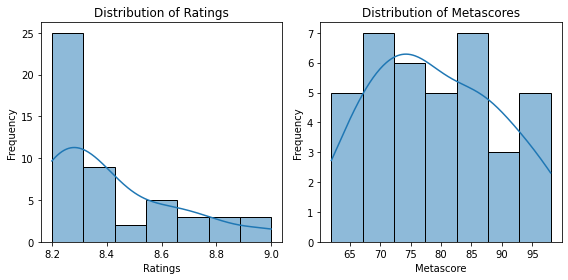

In [14]:
# Distribution of Ratings and Metascores
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Ratings', kde=True)
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Distribution of Ratings")

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Metascore', kde=True)
plt.xlabel("Metascore")
plt.ylabel("Frequency")
plt.title("Distribution of Metascores")

plt.tight_layout()
plt.show()


In [15]:
#summary statistics of rating and metascore
ratings_stats = df['Ratings'].describe()
metascores_stats = df['Metascore'].describe()

print("Ratings Summary Statistics:")
print(ratings_stats)
print("\nMetascores Summary Statistics:")
print(metascores_stats)


Ratings Summary Statistics:
count    50.000000
mean      8.424000
std       0.234355
min       8.200000
25%       8.200000
50%       8.350000
75%       8.600000
max       9.000000
Name: Ratings, dtype: float64

Metascores Summary Statistics:
count    38.000000
mean     79.105263
std      10.308195
min      62.000000
25%      71.250000
50%      78.000000
75%      86.750000
max      98.000000
Name: Metascore, dtype: float64


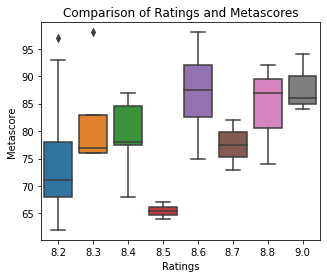

In [16]:
#comparison of metascore and ratings
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='Ratings', y='Metascore')
plt.xlabel("Ratings")
plt.ylabel("Metascore")
plt.title("Comparison of Ratings and Metascores")
plt.show()

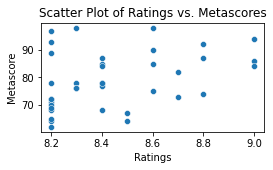

In [17]:
plt.figure(figsize=(4, 2))
sns.scatterplot(data=df, x='Ratings', y='Metascore')
plt.xlabel("Ratings")
plt.ylabel("Metascore")
plt.title("Scatter Plot of Ratings vs. Metascores")
plt.show()

-Maximum rating is 9 and minimum is 8.2
-Metascore: max-98,min-62
-8.6 Ratings have highest metascore and 8.2 Ratings have a range of maximum distribution of metascore from 82 to 93 

# 2. Explore Movie duration

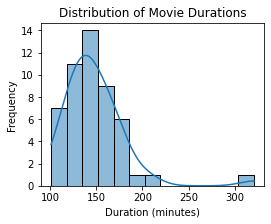

In [18]:
# Distribution of movie durations
plt.figure(figsize=(4, 3))
sns.histplot(data=df, x='Duration', kde=True)
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Movie Durations")
plt.show()


In [19]:
min_duration = df['Duration'].min()
max_duration = df['Duration'].max()
print("Minimum Duration:", min_duration, "minutes")
print("Maximum Duration:", max_duration, "minutes")

Minimum Duration: 101 minutes
Maximum Duration: 321 minutes


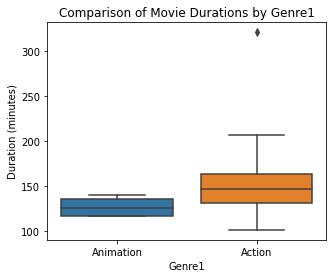

In [20]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x='genre1', y='Duration')
plt.xlabel("Genre1")
plt.ylabel("Duration (minutes)")
plt.title("Comparison of Movie Durations by Genre1")
plt.show()

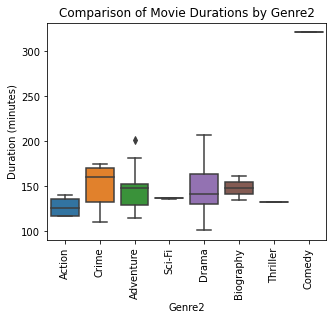

In [21]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='genre2', y='Duration')
plt.xlabel("Genre2")
plt.ylabel("Duration (minutes)")
plt.title("Comparison of Movie Durations by Genre2")
plt.xticks(rotation=90)
plt.show()

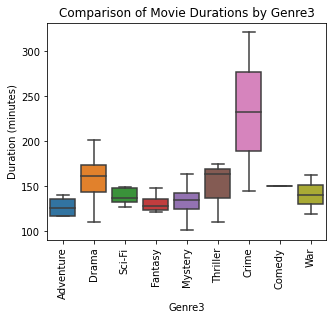

In [22]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='genre3', y='Duration')
plt.xlabel("Genre3")
plt.ylabel("Duration (minutes)")
plt.title("Comparison of Movie Durations by Genre3")
plt.xticks(rotation=90)
plt.show()

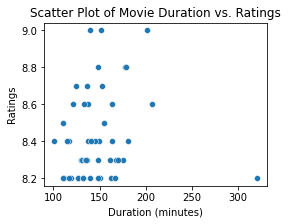

Correlation between Duration and Ratings: 0.11237861785515905


In [23]:
#relationship between movie duration and ratings
plt.figure(figsize=(4, 3))
sns.scatterplot(data=df, x='Duration', y='Ratings')
plt.xlabel("Duration (minutes)")
plt.ylabel("Ratings")
plt.title("Scatter Plot of Movie Duration vs. Ratings")
plt.show()


correlation_votes_ratings = df['Duration'].corr(df['Ratings'])
print("Correlation between Duration and Ratings:", correlation_votes_ratings)

-Most of the movie duration are of 150 mins
-Movie with maximum Movie Duration of 321 mins and with minimum Duration of 101 mins
-Maximum movie duration in genre1,genre2 and genre3 are of Action,Drama,Crime
Maximum Movies are Duration of 100-200 mins

# 3.Investigate votes

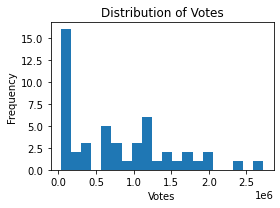

Votes Summary Statistics:
 count    5.000000e+01
mean     7.874350e+05
std      7.003423e+05
min      3.130400e+04
25%      1.270038e+05
50%      6.515420e+05
75%      1.175320e+06
max      2.727022e+06
Name: Votes, dtype: float64

Top 5 Movies by Votes:
                                           Movie Name    Votes
1                                    The Dark Knight  2727022
3                                          Inception  2420222
6                                         The Matrix  1963146
4  The Lord of the Rings: The Fellowship of the Ring  1920405
2      The Lord of the Rings: The Return of the King  1891880


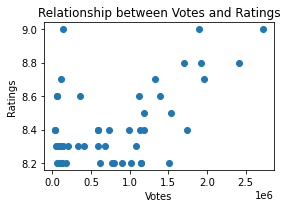

Correlation between Votes and Ratings: 0.5125156867912956


In [24]:
# Distribution of Votes
plt.figure(figsize=(4, 3))
plt.hist(df['Votes'], bins=20)
plt.xlabel("Votes")
plt.ylabel("Frequency")
plt.title("Distribution of Votes")
plt.tight_layout()
plt.show()

# Summary Statistics
votes_stats = df['Votes'].describe()
print("Votes Summary Statistics:\n", votes_stats)

# Top Rated Movies by Votes
top_rated_votes = df.nlargest(5, 'Votes')
print("\nTop 5 Movies by Votes:\n", top_rated_votes[['Movie Name', 'Votes']])

# Relationship between Votes and Ratings
plt.figure(figsize=(4, 3))
plt.scatter(df['Votes'], df['Ratings'])
plt.xlabel("Votes")
plt.ylabel("Ratings")
plt.title("Relationship between Votes and Ratings")

plt.tight_layout()
plt.show()

# Correlation Analysis
correlation_votes_ratings = df['Votes'].corr(df['Ratings'])
print("Correlation between Votes and Ratings:", correlation_votes_ratings)



-Dark Knight movie have maximum votes
-correlation between Votes and Ratings are 0.51

4.Genre Distribution

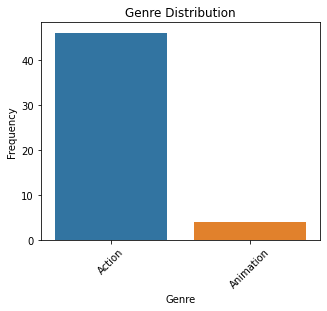

In [25]:
# Count the frequency of each genre
genre_counts = df['genre1'].value_counts()

# Plot the genre distribution using a bar plot
plt.figure(figsize=(5, 4))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.title("Genre Distribution")
plt.xticks(rotation=45)
plt.show()


In [26]:
most_common_genres = genre_counts.head(5)
genre_proportions = genre_counts.head(5) / len(df) * 100

print("Most Common Genres:")
print(most_common_genres)
print("\nGenre Proportions:")
print(genre_proportions)


Most Common Genres:
Action       46
Animation     4
Name: genre1, dtype: int64

Genre Proportions:
Action       92.0
Animation     8.0
Name: genre1, dtype: float64


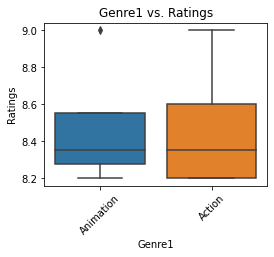

In [27]:
plt.figure(figsize=(4, 3))
sns.boxplot(data=df, x='genre1', y='Ratings')
plt.xlabel("Genre1")
plt.ylabel("Ratings")
plt.title("Genre1 vs. Ratings")
plt.xticks(rotation=45)
plt.show()


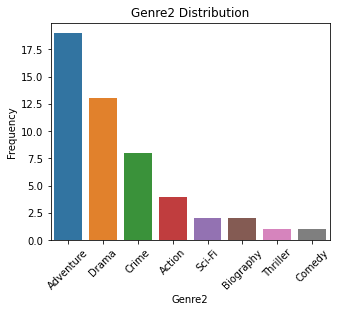

Most Common Genres:
Adventure    19
Drama        13
Crime         8
Action        4
Sci-Fi        2
Name: genre2, dtype: int64

Genre Proportions:
Adventure    38.0
Drama        26.0
Crime        16.0
Action        8.0
Sci-Fi        4.0
Name: genre2, dtype: float64


In [28]:
# Count the frequency of each genre
genre_counts = df['genre2'].value_counts()

# Plot the genre distribution using a bar plot
plt.figure(figsize=(5, 4))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xlabel("Genre2")
plt.ylabel("Frequency")
plt.title("Genre2 Distribution")
plt.xticks(rotation=45)
plt.show()


most_common_genres = genre_counts.head(5)
genre_proportions = genre_counts.head(5) / len(df) * 100

print("Most Common Genres:")
print(most_common_genres)
print("\nGenre Proportions:")
print(genre_proportions)


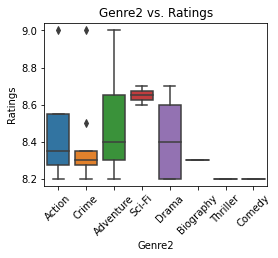

In [29]:
plt.figure(figsize=(4, 3))
sns.boxplot(data=df, x='genre2', y='Ratings')
plt.xlabel("Genre2")
plt.ylabel("Ratings")
plt.title("Genre2 vs. Ratings")
plt.xticks(rotation=45)
plt.show()


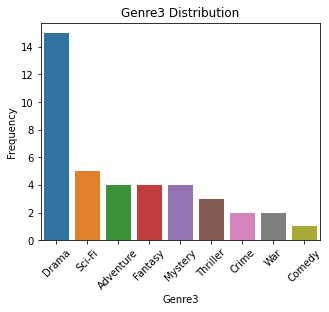

In [30]:
# Count the frequency of each genre
genre_counts = df['genre3'].value_counts()

# Plot the genre distribution using a bar plot
plt.figure(figsize=(5, 4))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xlabel("Genre3")
plt.ylabel("Frequency")
plt.title("Genre3 Distribution")
plt.xticks(rotation=45)
plt.show()


In [31]:
most_common_genres = genre_counts.head(5)
genre_proportions = genre_counts.head(5) / len(df) * 100

print("Most Common Genres:")
print(most_common_genres)
print("\nGenre Proportions:")
print(genre_proportions)


Most Common Genres:
Drama        15
Sci-Fi        5
Adventure     4
Fantasy       4
Mystery       4
Name: genre3, dtype: int64

Genre Proportions:
Drama        30.0
Sci-Fi       10.0
Adventure     8.0
Fantasy       8.0
Mystery       8.0
Name: genre3, dtype: float64


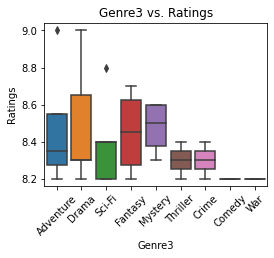

In [32]:
plt.figure(figsize=(4, 3))
sns.boxplot(data=df, x='genre3', y='Ratings')
plt.xlabel("Genre3")
plt.ylabel("Ratings")
plt.title("Genre3 vs. Ratings")
plt.xticks(rotation=45)
plt.show()

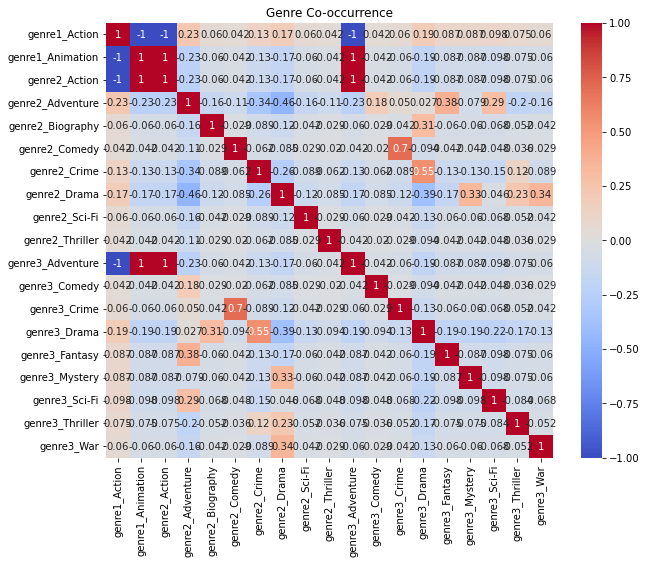

In [33]:
# Create a binary matrix indicating the presence or absence of each genre
genre_matrix = pd.get_dummies(df[['genre1', 'genre2', 'genre3']])

# Calculate the correlation matrix
genre_correlation = genre_matrix.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(genre_correlation, annot=True, cmap="coolwarm")
plt.title("Genre Co-occurrence")
plt.show()


-Genre1 have Action(92%) and Animation
-Genre2 have Adventure(38%),Drama, Crime, Action, Sci-fi,Biography, Thriller and Comedy
-Genre3 have Drame(30%), Sci-fi, Adventure, Fantasy, Mystery, Thriller, Crime, War and Comedy


# 5.Investigate gross collection

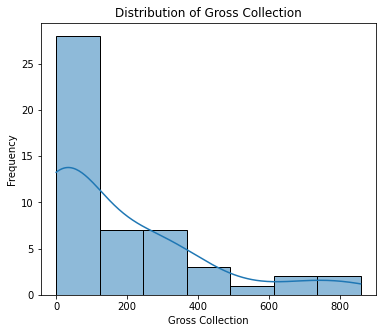

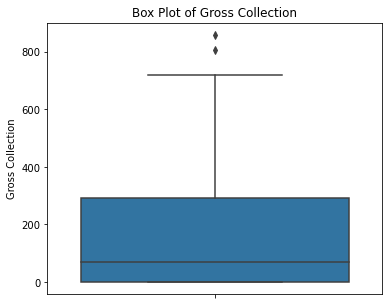

In [34]:
# Plot histogram of gross collection
plt.figure(figsize=(6, 5))
sns.histplot(data=df, x='Gross Collection', kde=True)
plt.xlabel("Gross Collection")
plt.ylabel("Frequency")
plt.title("Distribution of Gross Collection")
plt.show()

# Plot box plot of gross collection
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, y='Gross Collection')
plt.ylabel("Gross Collection")
plt.title("Box Plot of Gross Collection")
plt.show()


In [35]:
mean_gross = df['Gross Collection'].mean()
median_gross = df['Gross Collection'].median()
total_gross = df['Gross Collection'].sum()

print("Mean Gross Collection:", mean_gross)
print("Median Gross Collection:", median_gross)
print("Total Gross Collection:", total_gross)


Mean Gross Collection: 175.32100000000003
Median Gross Collection: 70.305
Total Gross Collection: 8766.05


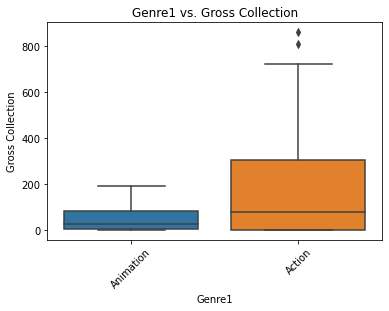

In [36]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='genre1', y='Gross Collection')
plt.xlabel("Genre1")
plt.ylabel("Gross Collection")
plt.title("Genre1 vs. Gross Collection")
plt.xticks(rotation=45)
plt.show()

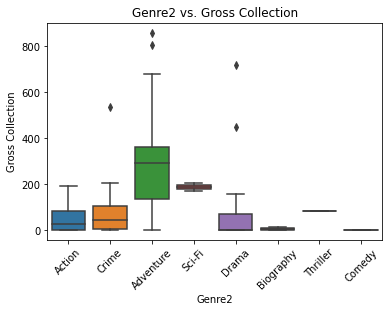

In [37]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='genre2', y='Gross Collection')
plt.xlabel("Genre2")
plt.ylabel("Gross Collection")
plt.title("Genre2 vs. Gross Collection")
plt.xticks(rotation=45)
plt.show()

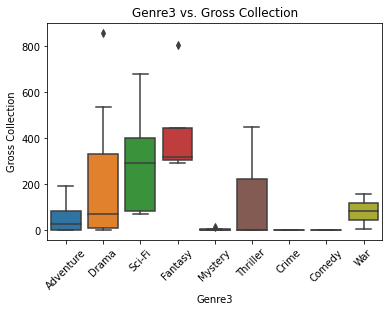

In [38]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='genre3', y='Gross Collection')
plt.xlabel("Genre3")
plt.ylabel("Gross Collection")
plt.title("Genre3 vs. Gross Collection")
plt.xticks(rotation=45)
plt.show()

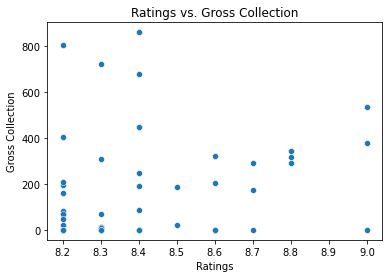

Correlation between Ratings and Gross Collection: 0.174251365398887


In [39]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Ratings', y='Gross Collection')
plt.xlabel("Ratings")
plt.ylabel("Gross Collection")
plt.title("Ratings vs. Gross Collection")
plt.show()

correlation = df['Ratings'].corr(df['Gross Collection'])
print("Correlation between Ratings and Gross Collection:", correlation)


-Gros collection mean:174.91 and total :8745.86
-Maximum Gross collection on Genre1,Genre2,Genre3 are of Action,Adventure,Sci-fi
-8.4 rating movies have Maximum Gross collection
-Correlation between Ratings and Gross Collection : 0.175

# 6.Visualize categorical variables

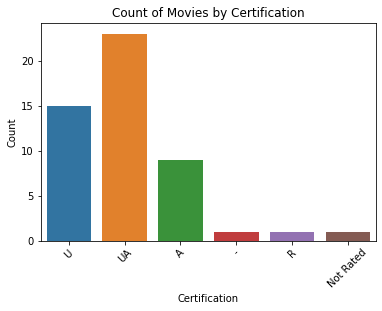

Top Certifications:
 UA    23
U     15
A      9
-      1
R      1
Name: Certification, dtype: int64


In [40]:
# Plot bar plot for certifications
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Certification')
plt.xlabel("Certification")
plt.ylabel("Count")
plt.title("Count of Movies by Certification")
plt.xticks(rotation=45)
plt.show()

# Get the most common certifications
top_certifications = df['Certification'].value_counts().head(5)
print("Top Certifications:\n", top_certifications)

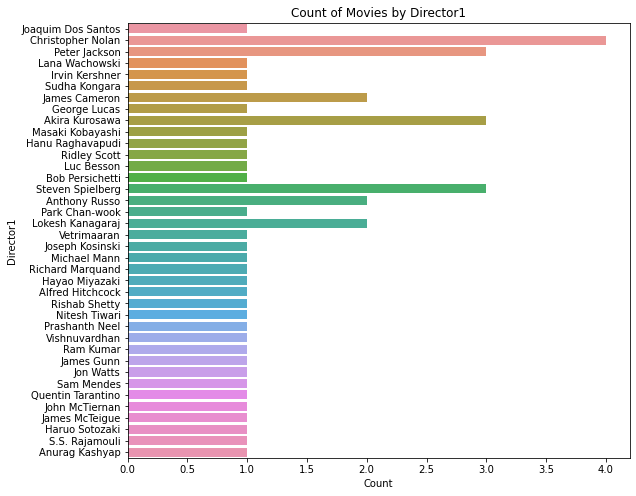

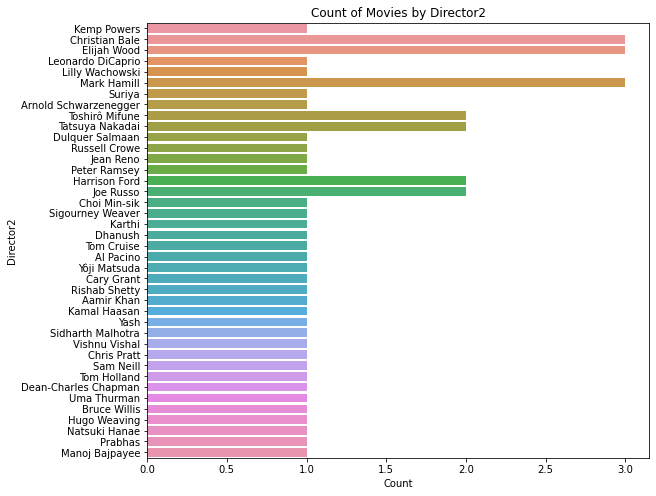


Top 5 Director1:
 Christopher Nolan    4
Peter Jackson        3
Akira Kurosawa       3
Steven Spielberg     3
James Cameron        2
Name: Director1, dtype: int64

Top 5 Director2:
 Elijah Wood       3
Christian Bale    3
Mark Hamill       3
Harrison Ford     2
Toshirô Mifune    2
Name: Director2, dtype: int64


In [41]:
# Plot bar plot for director1
plt.figure(figsize=(9,8))
sns.countplot(data=df, y='Director1')
plt.xlabel("Count")
plt.ylabel("Director1")
plt.title("Count of Movies by Director1")
plt.show()


# Plot bar plot for director2
plt.figure(figsize=(9,8))
sns.countplot(data=df, y='Director2')
plt.xlabel("Count")
plt.ylabel("Director2")
plt.title("Count of Movies by Director2")
plt.show()

# Get the most common directors
top_5_director1 = df['Director1'].value_counts().head(5)
top_5_director2 = df['Director2'].value_counts().head(5)

print("\nTop 5 Director1:\n", top_5_director1)
print("\nTop 5 Director2:\n", top_5_director2)

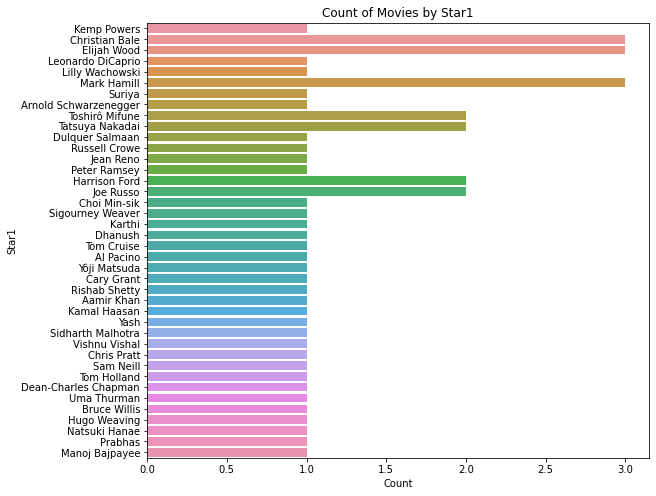

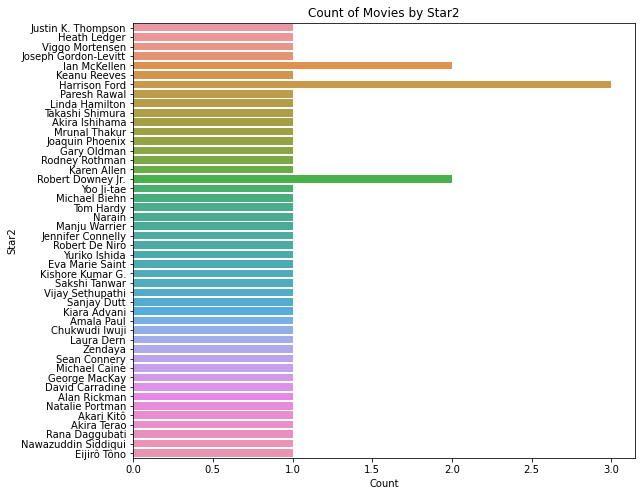

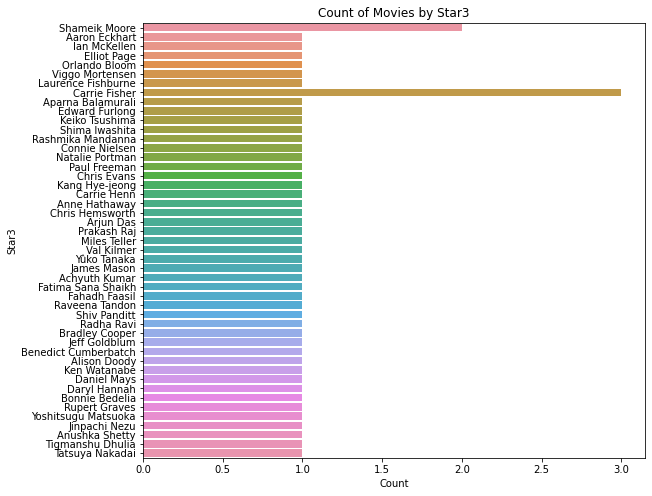

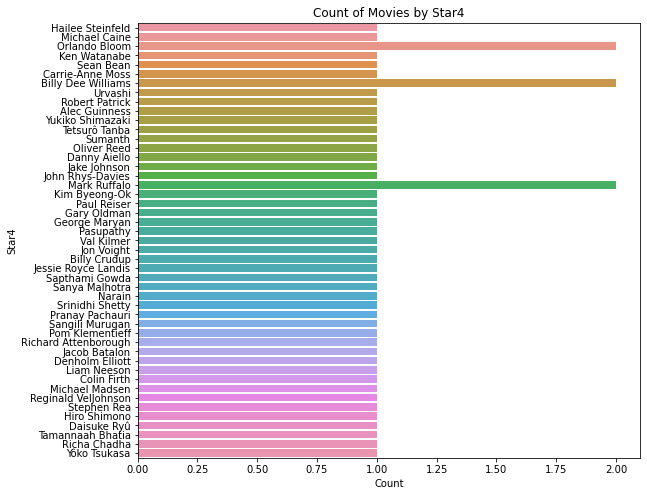


Top 5 Star1:
 Elijah Wood       3
Christian Bale    3
Mark Hamill       3
Harrison Ford     2
Toshirô Mifune    2
Name: star1, dtype: int64

Top 5 Star2:
 Harrison Ford         3
Ian McKellen          2
Robert Downey Jr.     2
Justin K. Thompson    1
Sean Connery          1
Name: star2, dtype: int64

Top 5 Star3:
 Carrie Fisher           3
Shameik Moore           2
Benedict Cumberbatch    1
James Mason             1
Achyuth Kumar           1
Name: star3, dtype: int64

Top 5 Star4:
 Orlando Bloom         2
Billy Dee Williams    2
Mark Ruffalo          2
Hailee Steinfeld      1
Jacob Batalon         1
Name: star4, dtype: int64


In [42]:
# Plot bar plot for stars
plt.figure(figsize=(9, 8))
sns.countplot(data=df, y='star1')
plt.xlabel("Count")
plt.ylabel("Star1")
plt.title("Count of Movies by Star1")
plt.show()

# Plot bar plot for stars
plt.figure(figsize=(9, 8))
sns.countplot(data=df, y='star2')
plt.xlabel("Count")
plt.ylabel("Star2")
plt.title("Count of Movies by Star2")
plt.show()

# Plot bar plot for stars
plt.figure(figsize=(9, 8))
sns.countplot(data=df, y='star3')
plt.xlabel("Count")
plt.ylabel("Star3")
plt.title("Count of Movies by Star3")
plt.show()

# Plot bar plot for stars
plt.figure(figsize=(9, 8))
sns.countplot(data=df, y='star4')
plt.xlabel("Count")
plt.ylabel("Star4")
plt.title("Count of Movies by Star4")
plt.show()

# Get the most common stars
top_5_star1 = df['star1'].value_counts().head(5)
top_5_star2 = df['star2'].value_counts().head(5)
top_5_star3 = df['star3'].value_counts().head(5)
top_5_star4 = df['star4'].value_counts().head(5)

print("\nTop 5 Star1:\n", top_5_star1)
print("\nTop 5 Star2:\n", top_5_star2)
print("\nTop 5 Star3:\n", top_5_star3)
print("\nTop 5 Star4:\n", top_5_star4)

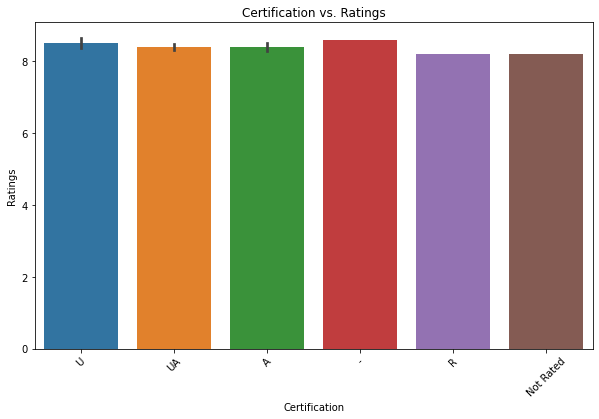

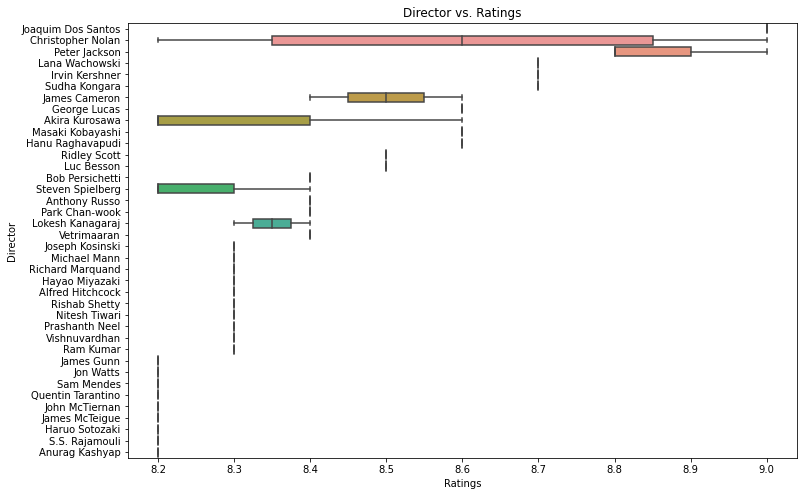

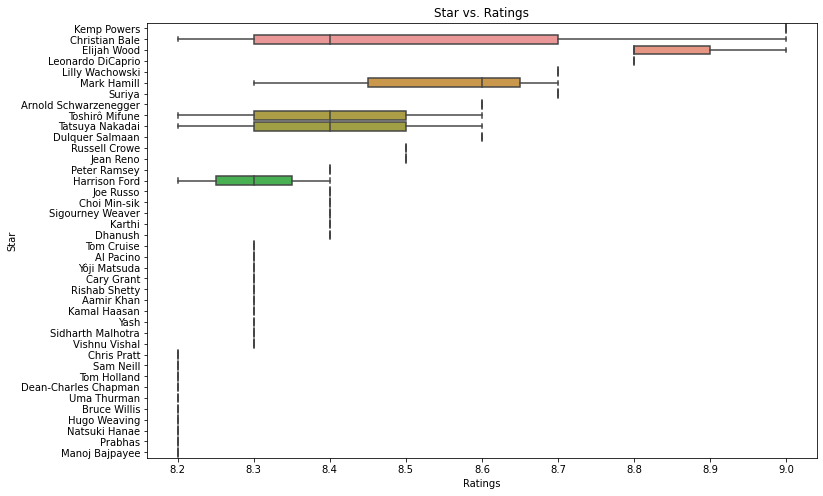

In [43]:
# Plot bar plot of certifications and ratings
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Certification', y='Ratings')
plt.xlabel("Certification")
plt.ylabel("Ratings")
plt.title("Certification vs. Ratings")
plt.xticks(rotation=45)
plt.show()

# Plot box plot of directors and ratings
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Director1', x='Ratings')
plt.xlabel("Ratings")
plt.ylabel("Director")
plt.title("Director vs. Ratings")
plt.show()

# Plot box plot of stars and ratings
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='star1', x='Ratings')
plt.xlabel("Ratings")
plt.ylabel("Star")
plt.title("Star vs. Ratings")
plt.show()


-Maximum movies of certification 'UA'
-Chrishtopher Nolan is the top Director of maximum movies
-Top Star with maximum movies are Elijah wood,Harrison Ford, Carrie Fisher and Orlando Boom

# 7.Perform Time based Analysis

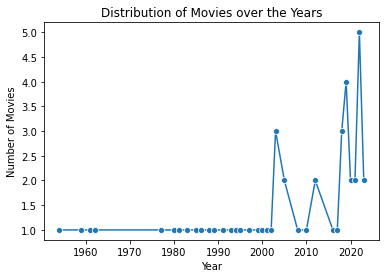

In [44]:
# Count the number of movies per year
movie_counts = df['Year'].value_counts().sort_index()

# Plot the distribution of movies over the years
plt.figure(figsize=(6, 4))
sns.lineplot(data=movie_counts, marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movies over the Years")
plt.show()


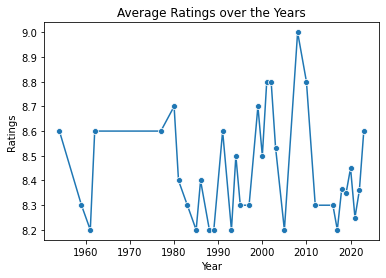

In [45]:
# Calculate the average ratings per year
average_ratings = df.groupby('Year')['Ratings'].mean()

plt.figure(figsize=(6, 4))
sns.lineplot(data=average_ratings, marker='o')
plt.xlabel("Year")
plt.ylabel("Ratings")
plt.title("Average Ratings over the Years")
plt.show()


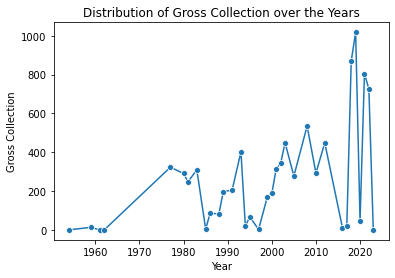

In [46]:
# Calculate the total gross collection per year
total_gross_collection = df.groupby('Year')['Gross Collection'].sum()

plt.figure(figsize=(6, 4))
sns.lineplot(data=total_gross_collection, marker='o')
plt.xlabel("Year")
plt.ylabel("Gross Collection")
plt.title("Distribution of Gross Collection over the Years")
plt.show()


-After 2000, Number of Movie making increased and 2020 are highest movie making
-Average Rating over the year increases and highest in 2010
-Gross Collection of movies increases over the year and maximum in 2019

# PHASE 4

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import joblib



# Separate the features and target variables
features = df.drop(['Sno','Votes', 'Gross Collection'], axis=1)
target_votes = df['Votes']
target_gross_collection = df['Gross Collection']

# Perform one-hot encoding on categorical features
features_encoded = pd.get_dummies(features)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features_encoded)

# Split the data into training and test sets
X_train, X_test, y_train_votes, y_test_votes = train_test_split(features_imputed, target_votes, test_size=0.2, random_state=42)
X_train, X_test, y_train_gross, y_test_gross = train_test_split(features_imputed, target_gross_collection, test_size=0.2, random_state=42)

# Apply scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# Train a linear regression model for votes prediction
linear_model_votes = LinearRegression()
linear_model_votes.fit(X_train_scaled, y_train_votes)
votes_predictions = linear_model_votes.predict(X_test_scaled)
mse_votes = mean_squared_error(y_test_votes, votes_predictions)
print("Votes Prediction MSE:", mse_votes)
print("Root Mean Squared Error:",np.sqrt(mse_votes))

scores = cross_val_score(linear_model_votes, features_imputed, target_votes, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Votes Prediction MSE: 251327700387.95233
Root Mean Squared Error: 501325.94226506207
Scores: [-0.34261816 -1.08038286  0.47439184 -2.00099042 -1.32687712]
Mean score: -0.8552953440772445
Standard deviation: 0.8504794945678777


In [49]:
# Train a Decision tree regression model for votes prediction
dtr_votes = DecisionTreeRegressor()
dtr_votes.fit(X_train_scaled, y_train_votes)
votes_predictions = dtr_votes.predict(X_test_scaled)
mse_votes = mean_squared_error(y_test_votes, votes_predictions)
print("Votes Prediction MSE:", mse_votes)
print("Root Mean Squared Error:",np.sqrt(mse_votes))

scores = cross_val_score(dtr_votes, features_imputed, target_votes, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Votes Prediction MSE: 214019852071.6
Root Mean Squared Error: 462622.7967487119
Scores: [-1.98219292e+00 -3.42584882e-01 -6.02607425e-01  1.88656676e-03
  2.20032910e-01]
Mean score: -0.5410931504331524
Standard deviation: 0.7738343415711638


In [50]:
# Train a support vector regression model for votes prediction
svr_votes = SVR()
svr_votes.fit(X_train_scaled, y_train_votes)
votes_predictions = svr_votes.predict(X_test_scaled)
mse_votes = mean_squared_error(y_test_votes, votes_predictions)
print("Votes Prediction MSE:", mse_votes)
print("Root Mean Squared Error:",np.sqrt(mse_votes))

scores = cross_val_score(svr_votes, features_imputed, target_votes, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Votes Prediction MSE: 320306120638.18854
Root Mean Squared Error: 565955.9352442455
Scores: [-1.28419599e+00 -8.09442260e-02 -1.77309423e-03 -1.85092431e+00
 -5.43618115e-02]
Mean score: -0.6544398858367435
Standard deviation: 0.7672199981374062


In [51]:
# Train a random forest regression model for votes prediction
rfr_votes = RandomForestRegressor()
rfr_votes.fit(X_train_scaled, y_train_votes)
votes_predictions = rfr_votes.predict(X_test_scaled)
mse_votes = mean_squared_error(y_test_votes, votes_predictions)
print("Votes Prediction MSE:", mse_votes)
print("Root Mean Squared Error:",np.sqrt(mse_votes))

scores = cross_val_score(rfr_votes, features_imputed, target_votes, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Votes Prediction MSE: 107513411133.58408
Root Mean Squared Error: 327892.37736425665
Scores: [-0.69938092  0.25729264  0.31072961 -0.00715073  0.60423875]
Mean score: 0.09314587179478806
Standard deviation: 0.44128469073873855


In [52]:
# Perform hyperparameter tuning using GridSearchCV for random forest regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train_votes)

# Get the best model from GridSearchCV
best_model_votes = grid_search.best_estimator_

# Save the best model to a file
joblib.dump(best_model_votes, 'best_model_votes.pkl')

# Print the best hyperparameters
print("Best Hyperparameters for votes  Prediction:")
print(grid_search.best_params_)

Best Hyperparameters for votes  Prediction:
{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [53]:
votes = pd.DataFrame({'votes': y_test_votes, 'predicted votes':votes_predictions}, columns=['votes', 'predicted votes'])
votes


,votes,predicted votes
13,60554,239310.67
39,773860,985234.30
30,96024,240495.63
45,65047,751425.15
17,991026,732741.41
48,99533,491244.53
26,679093,936259.06
25,597671,549866.54
32,64191,130567.66
19,598118,1060221.55


In [55]:
#for gross collection


# Train a Linear regressor model for gross collection prediction
lr_gross = LinearRegression()
lr_gross.fit(X_train_scaled, y_train_gross)
gross_predictions = lr_gross.predict(X_test_scaled)
mse_gross = mean_squared_error(y_test_gross, gross_predictions)
print("Gross Collection Prediction MSE:", mse_gross)
print("Root Mean Squared Error:",np.sqrt(mse_votes))

Gross Collection Prediction MSE: 46425.67357105736
Root Mean Squared Error: 327892.37736425665


In [56]:
# Train a Decision tree regressor model for gross collection prediction
dtr_gross = DecisionTreeRegressor()
dtr_gross.fit(X_train_scaled, y_train_gross)
gross_predictions = dtr_gross.predict(X_test_scaled)
mse_gross = mean_squared_error(y_test_gross, gross_predictions)
print("Gross Collection Prediction MSE:", mse_gross)
print("Root Mean Squared Error:",np.sqrt(mse_votes))

Gross Collection Prediction MSE: 32118.056800000002
Root Mean Squared Error: 327892.37736425665


In [57]:
# Train a support vector regressor model for gross collection prediction
svr_gross = SVR()
svr_gross.fit(X_train_scaled, y_train_gross)
gross_predictions = svr_gross.predict(X_test_scaled)
mse_gross = mean_squared_error(y_test_gross, gross_predictions)
print("Gross Collection Prediction MSE:", mse_gross)
print("Root Mean Squared Error:",np.sqrt(mse_votes))

Gross Collection Prediction MSE: 47825.90879204216
Root Mean Squared Error: 327892.37736425665


In [58]:
# Train a random forest regressor model for gross collection prediction
rf_model_gross = RandomForestRegressor()
rf_model_gross.fit(X_train_scaled, y_train_gross)
gross_predictions = rf_model_gross.predict(X_test_scaled)
mse_gross = mean_squared_error(y_test_gross, gross_predictions)
print("Gross Collection Prediction MSE:", mse_gross)
print("Root Mean Squared Error:",np.sqrt(mse_votes))

Gross Collection Prediction MSE: 43044.837318717
Root Mean Squared Error: 327892.37736425665


In [60]:
# Perform hyperparameter tuning using GridSearchCV for random forest regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train_gross)

# Get the best model from GridSearchCV
best_model_gross = grid_search.best_estimator_

# Save the best model to a file
joblib.dump(best_model_gross, 'best_model_gross.pkl')

# Print the best hyperparameters
print("Best Hyperparameters for Gross Collection  Prediction:")
print(grid_search.best_params_)

Best Hyperparameters for Gross Collection  Prediction:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [61]:
gross = pd.DataFrame({'gross': y_test_gross, 'predicted gross':gross_predictions}, columns=['gross', 'predicted gross'])
gross

,gross,predicted gross
13,0.00,19.5050
39,197.17,199.6772
30,0.00,94.2916
45,47.70,112.6721
17,248.16,174.7273
48,0.00,63.2497
26,67.44,66.2475
25,718.73,88.1386
32,0.00,34.4771
19,0.71,94.0956


-Minimum Root Mean square data are of Random Forest Regression.
-Random ForestRegression is the best model for both votes and gross collection